In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import seaborn as sns
import re

In [56]:
df =pd.read_csv('train.csv' )

df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [57]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

## Lets remove where we dont have text

In [58]:
df_news = df[~df['text'].isna()][['title','text','label','author']]

In [60]:
df_news.fillna('' , inplace=True)

In [61]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20761 non-null  object
 1   text    20761 non-null  object
 2   label   20761 non-null  int64 
 3   author  20761 non-null  object
dtypes: int64(1), object(3)
memory usage: 811.0+ KB


## Lets remove duplicates

In [62]:
df_news.drop_duplicates(subset=['text'],keep='first',inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20386 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20386 non-null  object
 1   text    20386 non-null  object
 2   label   20386 non-null  int64 
 3   author  20386 non-null  object
dtypes: int64(1), object(3)
memory usage: 796.3+ KB


In [63]:
df_news["full_text"] = df_news["title"] + " " + df_news["author"] + " " + df_news["text"]

In [64]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20386 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      20386 non-null  object
 1   text       20386 non-null  object
 2   label      20386 non-null  int64 
 3   author     20386 non-null  object
 4   full_text  20386 non-null  object
dtypes: int64(1), object(4)
memory usage: 955.6+ KB


## Number of words

Let's compare the number of words in the fake news and real news and try to distinguish pattern in the fake and real news based on number of words used

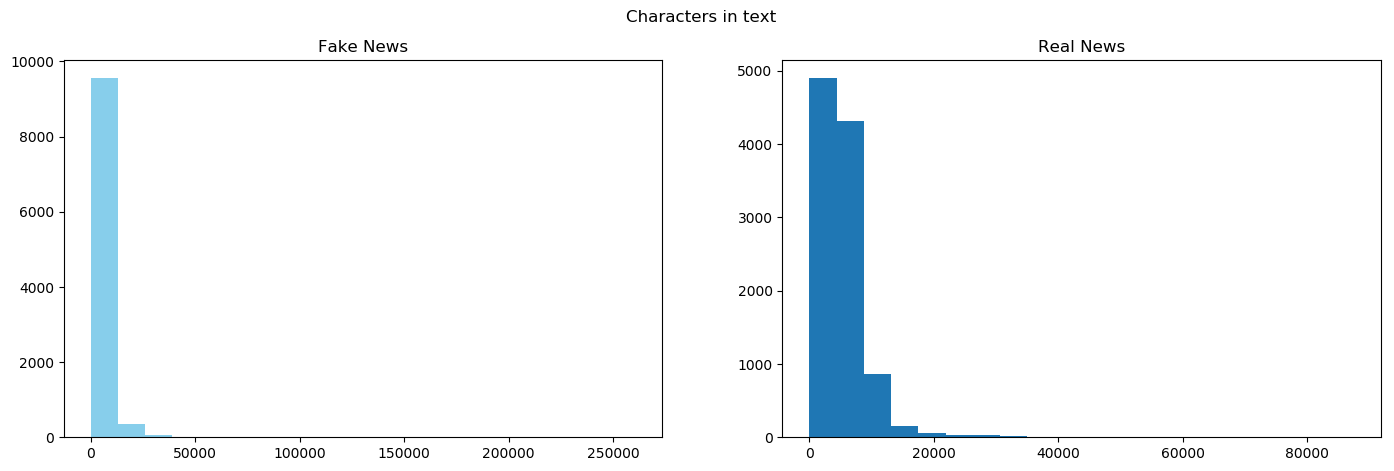

In [8]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df_news[df_news["label"]==1]['text'].str.len()
ax1.hist(length,bins = 20,color='skyblue')
ax1.set_title('Fake News')
length=df_news[df_news["label"]==0]['text'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real News')
fig.suptitle('Characters in text')
plt.show()

## General Word Cloud 

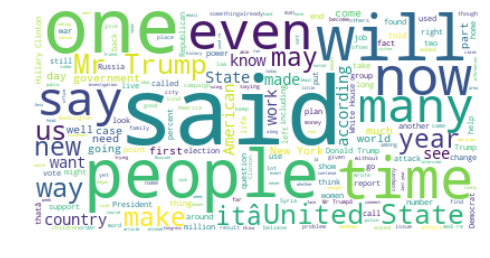

In [9]:
text = " ".join([x for x in df_news.text])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

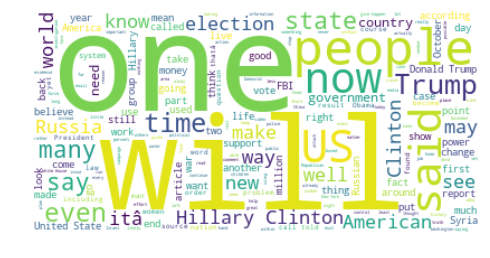

In [10]:
## for fake

text = " ".join([x for x in df_news.text[df_news.label==1]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

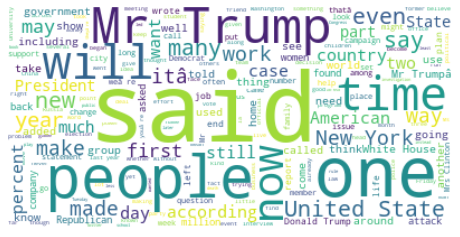

In [11]:
## for real

text = " ".join([x for x in df_news.text[df_news.label==0]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
print('Number of 0 (Not Fake) : ', df_news["label"].value_counts()[0])
print('Number of 1 (Fake) : ', df_news["label"].value_counts()[1])

Number of 0 (Not Fake) :  10387
Number of 1 (Fake) :  9999


Text(0.5,1,'Target Count')

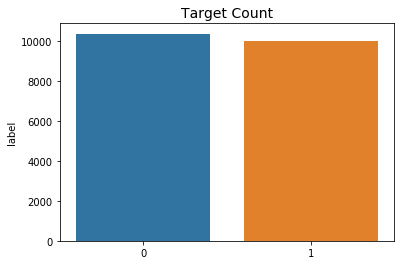

In [29]:
label = df_news["label"].value_counts()
sns.barplot(label.index, label)
plt.title('Target Count', fontsize=14)

## Text Cleaning

In [14]:
from nltk.stem.porter import PorterStemmer
import nltk
import re
from nltk.corpus import stopwords
ps=PorterStemmer()

In [22]:
# text preprocessing
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(contractions.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)


In [65]:
# Dataset Preprocessing
def text_cleaning(text):
    text = re.sub("[^a-zA-Z]", " ", text) # removing punctuation
    text = text.lower()
    text = expandContractions(text)
    return text

df_news['full_text'] = df_news['full_text'].apply(text_cleaning)

In [71]:
df_news=df_news[['full_text','label']]

## Train Test Split

In [72]:
train_df,eval_df = train_test_split(df_news,test_size = 0.05)

## using simpletransformers

In [70]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=2, 
                            args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [73]:
model.train_model(train_df)

C:\Users\techs\Anaconda3\lib\site-packages\simpletransformers\classification\classification_model.py:353: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


C:\Users\techs\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


C:\Users\techs\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(2421, 0.10257032832053263)

In [74]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

C:\Users\techs\Anaconda3\lib\site-packages\simpletransformers\classification\classification_model.py:851: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [75]:
print(result)
print(model_outputs)

{'mcc': 0.9902017781673297, 'tp': 490, 'tn': 525, 'fp': 1, 'fn': 4, 'eval_loss': 0.023656923784869832}
[[ 5.90197134 -4.53683853]
 [-4.50951529  3.50313616]
 [ 5.45192528 -4.02847004]
 ...
 [-4.68856716  3.62463927]
 [ 5.96656942 -4.56476974]
 [ 5.96766853 -4.51814699]]


In [76]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [78]:
true = eval_df['label'].tolist()
predicted = lst

In [79]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[525,   1],
       [  4, 490]], dtype=int64)

In [80]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['real','fake']))


              precision    recall  f1-score   support

        real       0.99      1.00      1.00       526
        fake       1.00      0.99      0.99       494

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020



In [87]:
test_df =pd.read_csv('test.csv' ,  encoding='ISO-8859-1')

test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. â After years of scorni..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you donât succeed, try a differe..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [88]:
test_df.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [89]:
test_df.fillna('' , inplace=True)

In [90]:
test_df["full_text"] = test_df["title"] + " " + test_df["author"] + " " + test_df["text"]

In [91]:
test_df['full_text'] = test_df['full_text'].apply(text_cleaning)

In [92]:
final_prediction = model.predict(list(test_df.full_text))

In [93]:
final_prediction

(array([0, 1, 1, ..., 0, 1, 0], dtype=int64),
 array([[ 5.94915104, -4.53869104],
        [-4.98139238,  3.85077763],
        [-4.62291193,  3.55843735],
        ...,
        [ 5.68793678, -4.21044827],
        [-4.56741714,  3.4853344 ],
        [ 5.53588533, -4.12220526]]))

In [94]:
print('Loading in Submission File...')

submit_df = pd.read_csv("submit.csv")
print(submit_df.columns)
submit_df['label'] = final_prediction[0]

submit_df.to_csv('fake_submit.csv', index=False)

Loading in Submission File...
Index(['id', 'label'], dtype='object')
